In [56]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
from pandas.api.types import CategoricalDtype

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [57]:
df = pd.read_csv("../output/data.csv")
df['year'] = df['year'].astype(int)
df['파종'] = df['plot'].apply(lambda x: '광산' if x <= 4 else '세조')
df['시비'] = df['plot'].apply(lambda x: '추비' if x in [2, 3, 6, 7] else '기비')
df['파종_시비'] = df['파종'] + '_' + df['시비']
df

,plot,생육단계,초장(cm),LAI,SPAD,year,NDVI,GNDVI,RVI,CVI,NDRE,파종,시비,파종_시비
0,1,개화기,93.25,3.493,42.37,2024,0.894183,0.819812,19.074239,5.748887,0.525952,광산,기비,광산_기비
1,1,개화후2주,82.70,2.751,31.58,2024,0.838423,0.763993,11.844057,4.938660,0.425021,광산,기비,광산_기비
2,1,개화후4주,82.95,0.844,16.30,2024,0.406991,0.592470,2.387791,6.464654,0.138656,광산,기비,광산_기비
3,1,분얼전기,24.90,1.037,34.95,2024,0.777650,0.673917,10.722392,3.111412,0.370741,광산,기비,광산_기비
4,1,분얼후기,63.70,2.001,41.49,2024,0.881635,0.768458,18.765352,3.586712,0.490232,광산,기비,광산_기비
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,8,개화후2주,72.60,1.005,43.98,2023,0.583267,0.658171,4.098754,0.017824,0.261414,세조,기비,세조_기비
92,8,개화후4주,67.00,0.172,9.14,2023,0.535424,0.641265,3.878025,0.008298,0.190424,세조,기비,세조_기비
93,8,분얼전기,20.25,0.010,46.34,2023,0.203897,0.388780,1.545758,0.047671,0.090268,세조,기비,세조_기비
94,8,분얼후기,44.50,0.926,49.28,2023,0.495374,0.563026,3.364129,0.010560,0.217584,세조,기비,세조_기비


In [58]:
def data_mean(target):
    y_variables = ['초장(cm)', 'LAI', 'SPAD', 'NDVI', 'GNDVI', 'RVI', 'CVI', 'NDRE']

    df_mean = df.groupby(['year', '생육단계', target])[y_variables].mean().reset_index()

    growth_stages = ['분얼전기', '분얼후기', '개화기', '개화후2주', '개화후4주', '수확기']
    df_mean['생육단계'] = pd.Categorical(df_mean['생육단계'], categories=growth_stages, ordered=True)

    # 데이터 정렬
    df_mean = df_mean.sort_values('생육단계')

    return df_mean

In [65]:
def data_draw(target, df_mean, y, con):
    fig, ax = plt.subplots(figsize=(8, 6))

    # 시비 및 연도별로 색상과 선 스타일 설정
    colors = {'추비': 'green', '기비': 'orange'}
    linestyles = {2023: '--', 2024: '-'}
    
    # 각 조건에 따라 그래프 그리기
    for (fertilization, year), group_data in df.groupby(['시비', 'year']):
        ax.plot(group_data['생육단계'], group_data['NDVI'], 
                label=f'{year} {fertilization}', 
                color=colors[fertilization], 
                linestyle=linestyles[year],
                marker='o')
    
    # 그래프 꾸미기
    ax.set_xlabel('생육단계')
    ax.set_ylabel('NDVI')
    ax.set_title('생육단계별 NDVI')
    ax.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # 그래프 표시
    plt.show()
    # if con == '생육':
    #     colors = {}
    #     if target == '시비':
    #         colors = {'기비': 'green', '추비': 'orange'}
    #     elif target == '파종':
    #         colors = {'광산': 'blue', '세조': 'red'}
    #     elif target == '파종_시비':
    #         colors = {'광산_기비': 'blue', '광산_추비': 'red', '세조_기비': 'green', '세조_추비': 'orange'}
    # else:    
    #     colors = {}
    #     if target == '시비':
    #         # colors = {'기비': 'lightskyblue', '추비': 'lightcoral'}
    #         colors = {'기비': 'lightgreen', '추비': 'lightsalmon'}
    #     elif target == '파종':
    #         colors = {'광산': 'lightskyblue', '세조': 'lightcoral'}
    #     elif target == '파종_시비':
    #         colors = {
    #             '광산_기비': 'lightskyblue',
    #             '광산_추비': 'lightcoral',
    #             '세조_기비': 'lightgreen',
    #             '세조_추비': 'lightsalmon'
    #         }
    # linestyles = {2023: '--', 2024: '-'}
    # 
    # # 그래프 그리기
    # fig, ax = plt.subplots(figsize=(5, 3))
    # 
    # for (year, target), group in df_mean.groupby(['year', target]):
    #     # group['생육단계'] = group['생육단계'].astype(CategoricalDtype(categories=['분얼전기', '분얼후기', '개화기', '개화후2주', '개화후4주', '수확기'], ordered=True))
    # 
    #     ax.plot(
    #         group['생육단계'],
    #         group[y],  # 'LAI'로 변경하려면 여기를 수정하세요.
    #         label=f'{year} - {target}',
    #         color=colors[target],
    #         linestyle=linestyles[year],
    #         marker='o'  # 각 지점을 강조하려면 추가
    #     )
    # 
    # ax.set_xlabel('생육단계')
    # ax.set_ylabel(y)
    # ax.set_title(f'생육단계별 {y}')
    # # ax.legend()
    # plt.show()

    # fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    # fig.subplots_adjust(hspace=0.5, wspace=0.3)
    # 
    # y_values = ['초장(cm)', 'LAI', 'SPAD', 'NDVI', 'GNDVI', 'RVI', 'CVI', 'NDRE']
    # 
    # for i, ax in enumerate(axes.flat):
    #     if i < len(y_values):
    #         y_col = y_values[i]
    #         for (year, target), group in df_mean.groupby(['year', target]):
    #             ax.plot(
    #                 group['생육단계'],
    #                 group[y_col],
    #                 label=f'{year} - {target}',
    #                 color=colors[target],
    #                 linestyle=linestyles[year],
    #                 marker='o'
    #             )
    #         ax.set_title(f'{y_col} 그래프')
    #         ax.set_xlabel('생육단계')
    #         ax.set_ylabel(y_col)
    #         ax.legend()
    #     else:
    #         ax.axis('off')
    # 
    # plt.show()

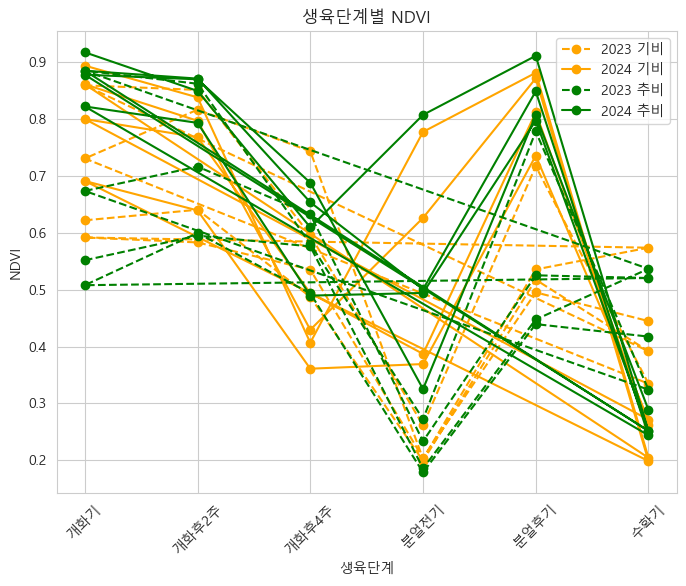

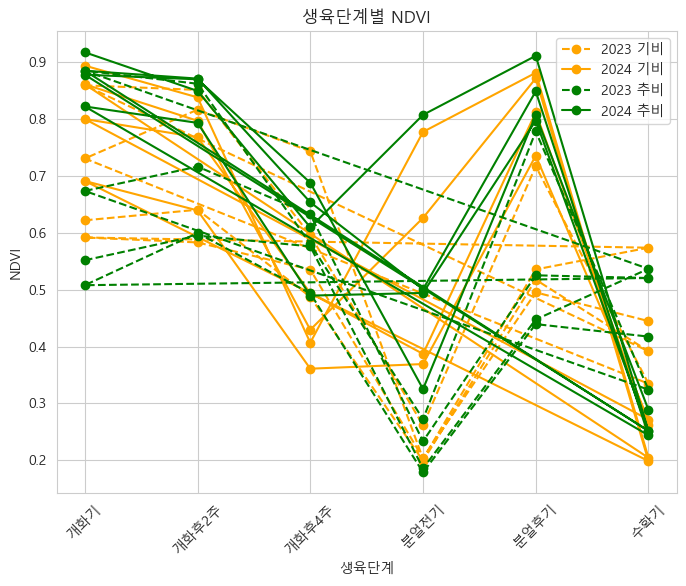

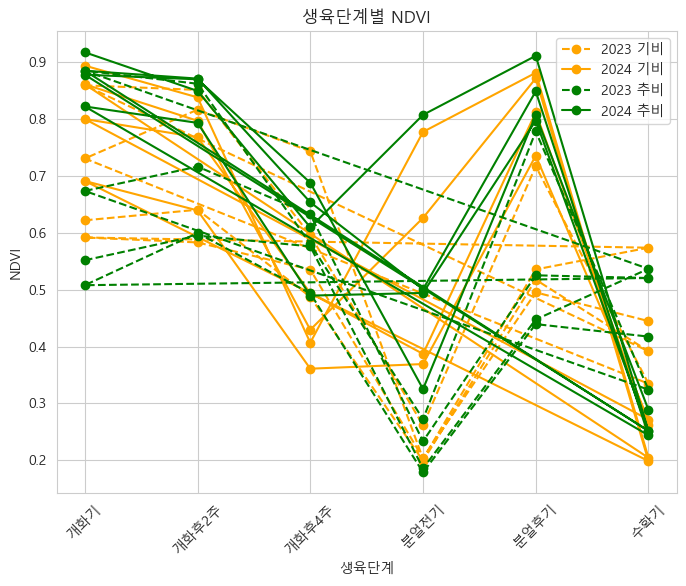

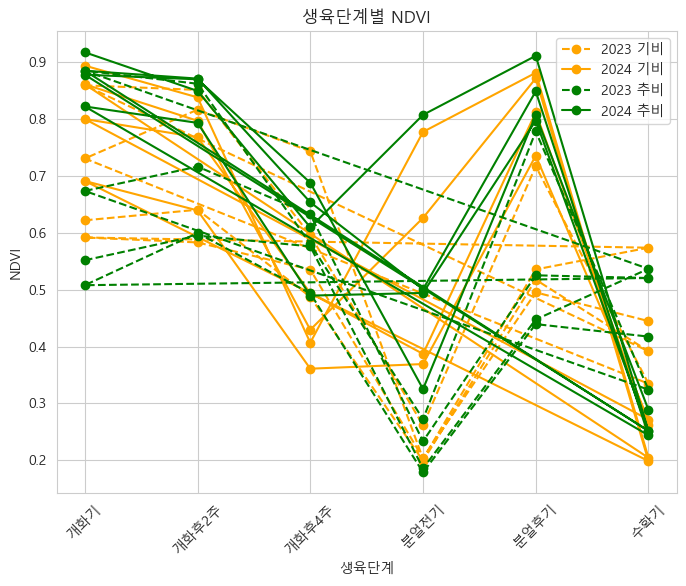

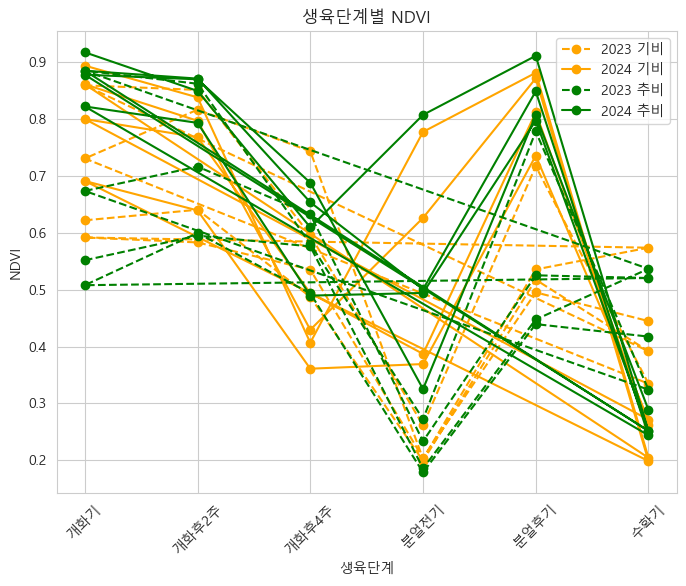

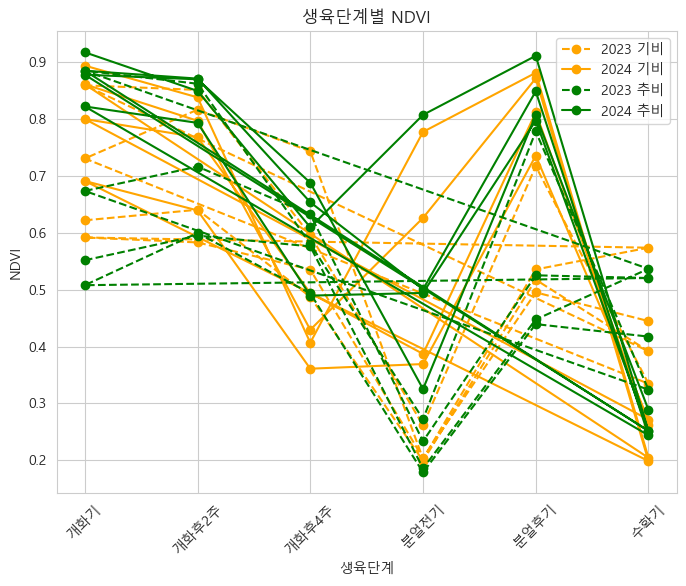

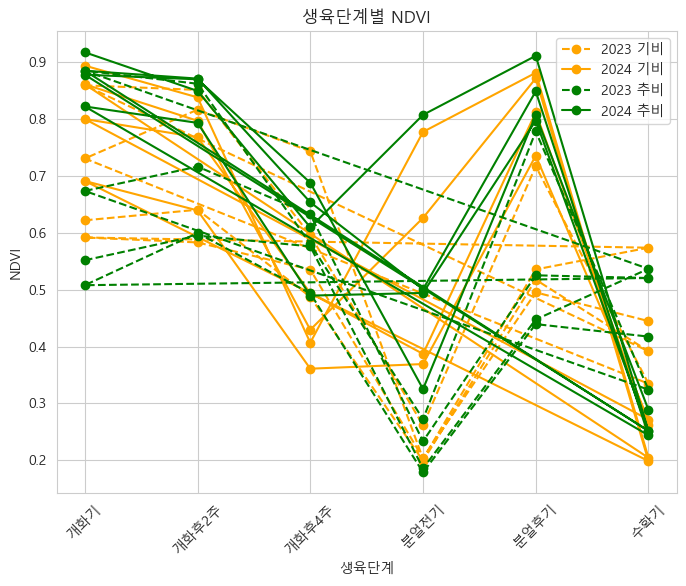

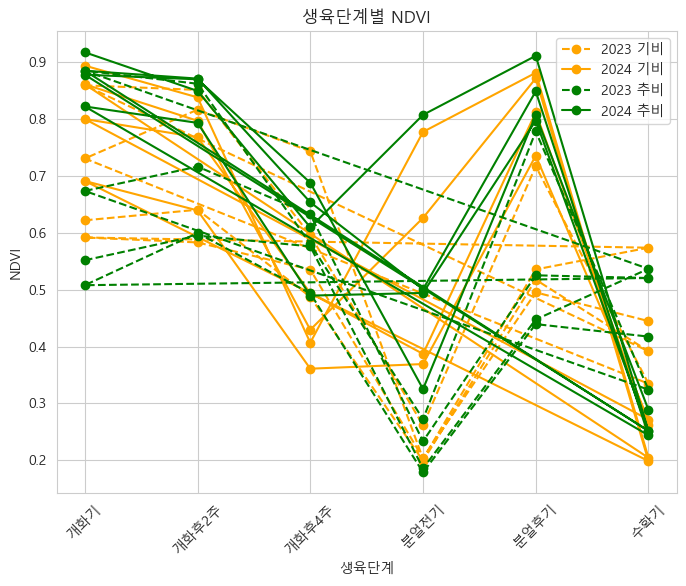

In [66]:
target = '시비'
# df = df.drop(columns=['plot', '파종', '파종_시비'])
df_mean = data_mean(target)
# 생육단계열이 nan 값이면 그 행을 삭제
df_mean = df_mean.groupby(['year', '생육단계', target]).mean().reset_index()
df_mean = df_mean.dropna(subset=['생육단계', 'LAI'])
drone = ['NDVI', 'GNDVI', 'RVI', 'CVI', 'NDRE']
growth = ['초장(cm)', 'LAI', 'SPAD', ]

for y in growth:
    data_draw(target, df, y, '생육')

for y in drone:

    data_draw(target, df, y, '드론')